based on https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim

In [36]:
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter, defaultdict
from tqdm import tqdm
%matplotlib inline

import sys


In [2]:
max_vocab_size = 3000
emb_size = 1000

In [3]:
df = pd.read_excel('data/df_2.xlsx')#,header=None).rename(columns={0:"label",1:"text"})
Y = pd.read_csv('data/eurlex_labels.txt',header=None,sep='\s').rename(index =str,columns={0:"title",1:'label'})
# Y = y.copy()
t = df.merge(Y,on ='label',how='inner')

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
df.head()

,label,text
0,14,convent intern commiss rhine bern convent le g...
1,17,exchang letter commiss intern bureau weight me...
2,38,council decis juli conclus protocol access uni...
3,41,addit agreement agreement product clock watch ...
4,42,exchang letter india excel mr swaminathan amba...


In [5]:
%%time
word2vec_our_model = Word2Vec([i.split(' ') for i in df['text']], 
                              max_vocab_size=max_vocab_size, 
                              size=emb_size, window=5, min_count=5, workers=8, seed=1)

CPU times: user 11min 43s, sys: 4.76 s, total: 11min 48s
Wall time: 1min 35s


In [6]:
vocab = list(word2vec_our_model.wv.vocab)
X = word2vec_our_model[vocab]

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


In [8]:
df2 = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])


In [38]:
# df2

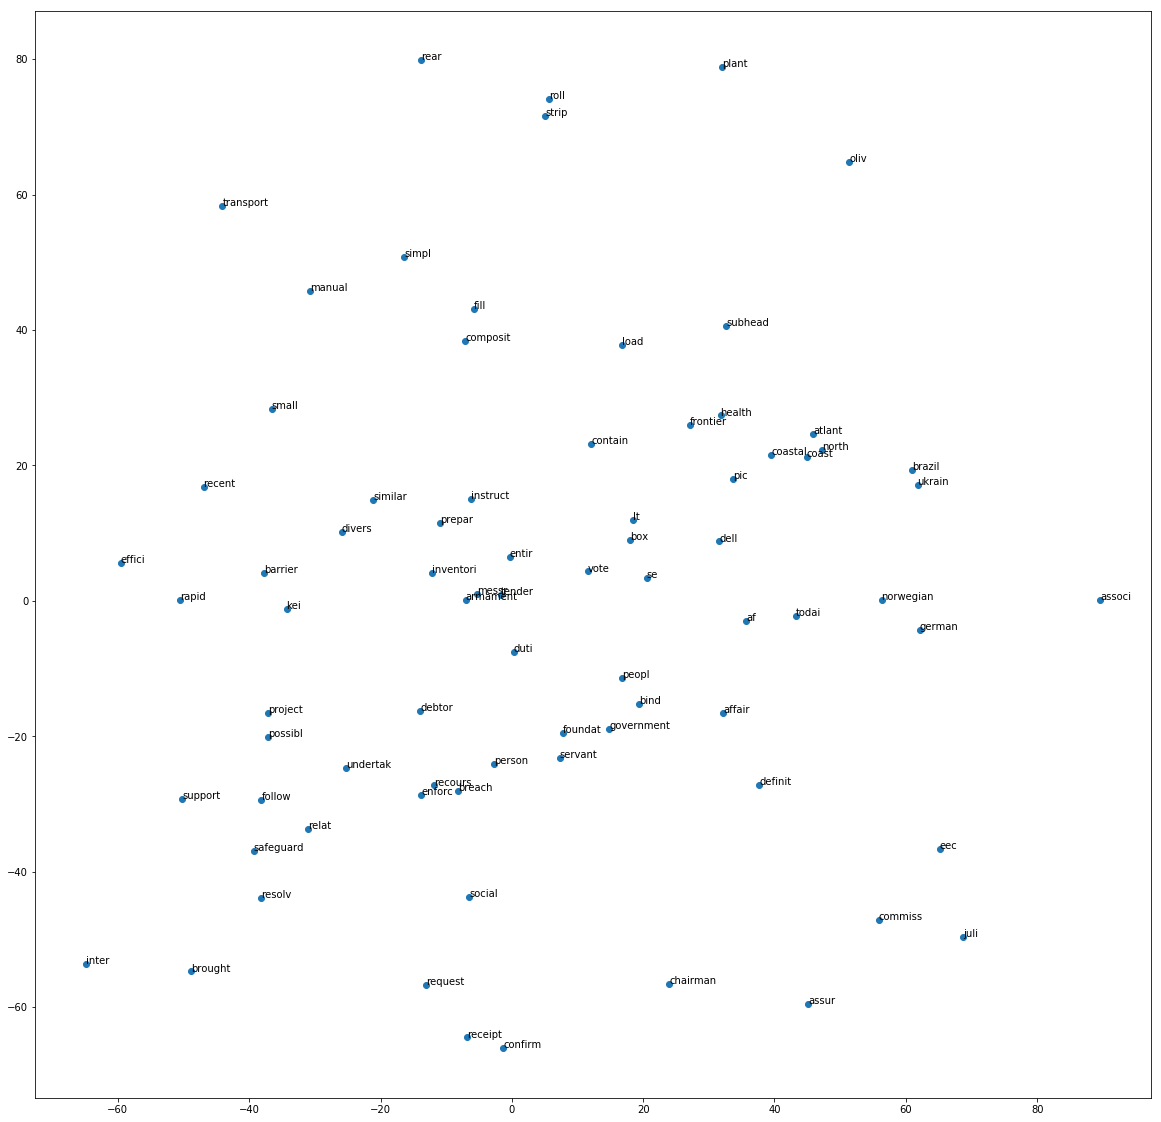

CPU times: user 1.26 s, sys: 392 ms, total: 1.65 s
Wall time: 1.09 s


In [11]:
%%time
alpha = 20
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df2['x'][::alpha], df2['y'][::alpha])

for word, pos in df2[::alpha].iterrows():
    ax.annotate(word, pos)
    
plt.show()

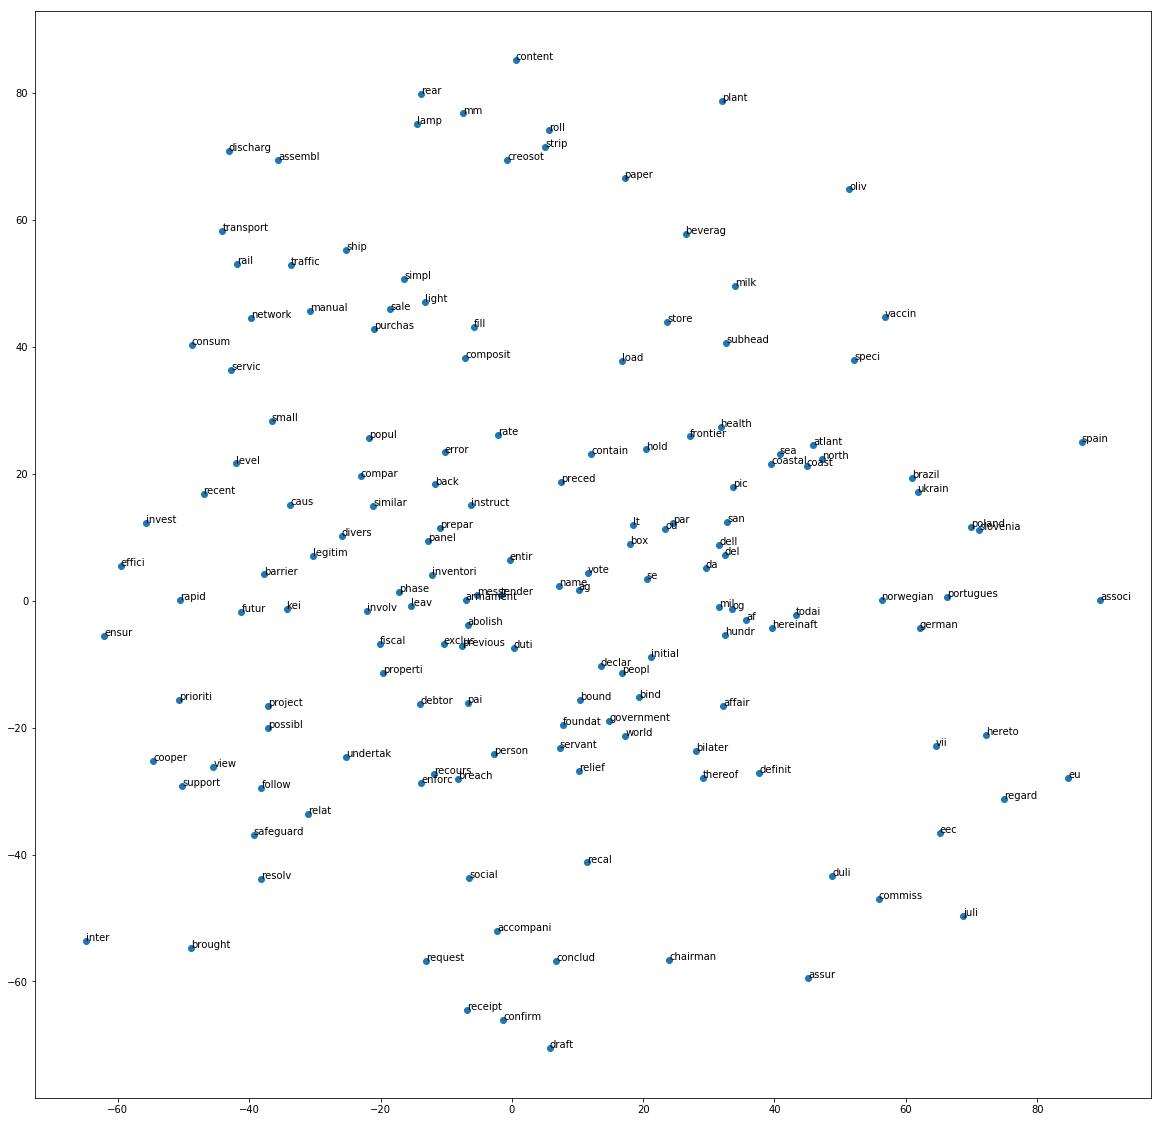

CPU times: user 1.74 s, sys: 412 ms, total: 2.15 s
Wall time: 1.57 s


In [12]:
%%time
alpha = 10
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df2['x'][::alpha], df2['y'][::alpha])

for word, pos in df2[::alpha].iterrows():
    ax.annotate(word, pos)
    
plt.show()

In [14]:
Y['title'].value_counts()

ec_agreement                   1253
import                         1156
state_aid                       939
health_control                  929
approximation_of_laws           886
originating_product             859
european_economic_area          740
information_transfer            637
third_country                   629
eu_country                      588
marketing_standard              559
marketing                       556
tariff_quota                    529
germany                         516
health_certificate              515
veterinary_inspection           514
agricultural_product            494
control_of_state_aid            479
france                          473
animal_disease                  470
labelling                       460
foodstuff                       430
ec_association_agreement        401
community_programme             388
public_health                   382
italy                           381
environmental_protection        375
animal_product              

In [15]:
category1 = 'public_health' #color red
category2 = 'motor_vehicle' #color blue



In [17]:
%%time
max_vocab_size = 10000
emb_size = 100

word2vec_our_model = Word2Vec([i.split(' ') for i in df['text']], 
                              max_vocab_size=max_vocab_size, 
                              size=emb_size, window=5, min_count=5, workers=8, seed=1)

CPU times: user 3min 48s, sys: 3.46 s, total: 3min 51s
Wall time: 40.5 s


In [85]:
#Определим топовые слова для каждого класса

category1_df = t[t['title'] == category1]['text']
category2_df = t[t['title'] == category2]['text']

y_ = t['title']
from sklearn.feature_extraction.text import TfidfVectorizer
vect1 = TfidfVectorizer()
x1 = vect1.fit_transform(category1_df)
w1 = {} # color for class 1
for word, ind in tqdm(vect1.vocabulary_.items()):
    w1[word] = x1[:, ind].mean()
    
vect2 = TfidfVectorizer()
x2 = vect2.fit_transform(category2_df)
w2 = {} # color for class 2
for word, ind in tqdm(vect2.vocabulary_.items()):
    w2[word] = x2[:, ind].mean()

    dct = df2.T

100%|██████████| 5860/5860 [00:07<00:00, 805.39it/s]


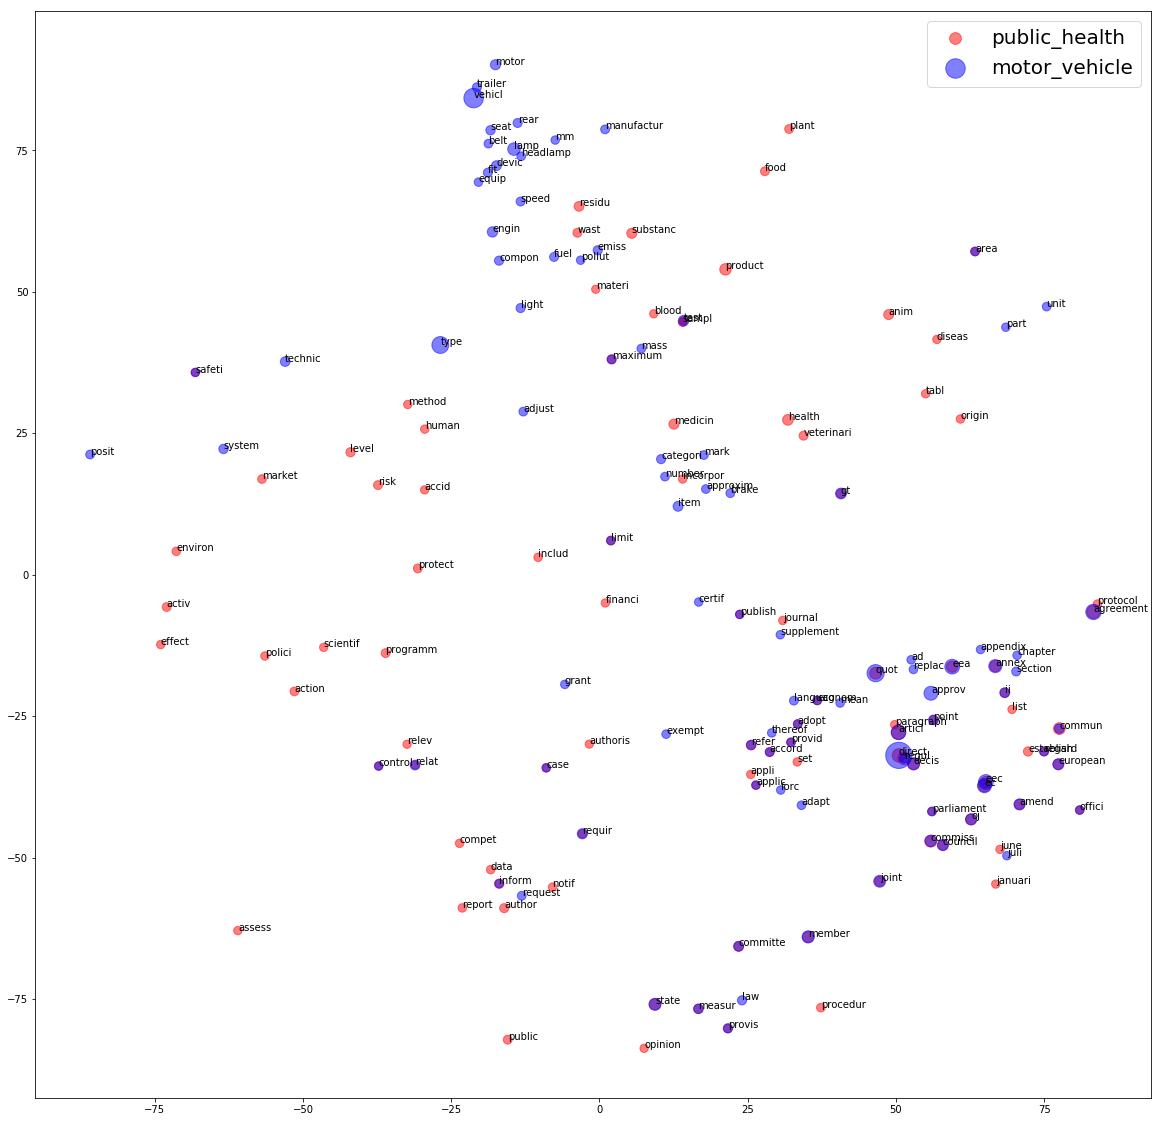

In [95]:
#Возьмем топ отрисуем topN слов

def size(lst):
    return 5**(2.5+10*np.array(lst))

topN = 100
lst_w_all = []
plt.figure(figsize = (20,20))
lst_w, lst_x, lst_y, lst_clr = [], [], [], []
for _w1, clr in list(sorted(w1.items(), key = lambda x:-x[1]))[:topN]:
    if _w1 in dct:
        lst_w_all.append(_w1)
        lst_x.append(dct[_w1]['x'])
        lst_y.append(dct[_w1]['y'])
        lst_clr.append(clr)
plt.scatter(lst_x, lst_y, s = size(lst_clr), color = 'red', label = category1, alpha = 0.5)

lst_w, lst_x, lst_y, lst_clr = [], [], [], []
for _w2, clr in list(sorted(w2.items(), key = lambda x:-x[1]))[:topN]:
    if _w2 in dct:
        lst_w_all.append(_w2)
        lst_x.append(dct[_w2]['x'])
        lst_y.append(dct[_w2]['y'])
        lst_clr.append(clr)
        
plt.scatter(lst_x, lst_y, s = size(lst_clr), color = 'blue', label = category2, alpha = 0.5)

for w in list(set(lst_w_all)):
    if w in dct:
        plt.annotate(w, (dct[w]['x'], dct[w]['y']))
plt.legend(fontsize = 20)
plt.show()

In [135]:
# max_vocab_size = 10000
# emb_size = 100

# word2vec_our_model = Word2Vec([i.split(' ') for i in df['text']], 
#                                max_vocab_size=max_vocab_size, 
#                                size=emb_size, window=5, min_count=5, workers=8, seed=1)

def size(lst):
    #return 5**(2.5+10*np.array(lst))
    lst = np.array(lst)
    lst = 10+ 2.2**(6*lst/(max(lst)-min(lst)))
    return lst

def draw_picture_for_two_category(category1 = 'public_health', category2 = 'motor_vehicle'):

    
    #Определим топовые слова для каждого класса

    category1_df = t[t['title'] == category1]['text']
    category2_df = t[t['title'] == category2]['text']

    from sklearn.feature_extraction.text import TfidfVectorizer
    vect1 = TfidfVectorizer()
    x1 = vect1.fit_transform(category1_df)
    w1 = {} # color for class 1
    for word, ind in tqdm(vect1.vocabulary_.items()):
        w1[word] = x1[:, ind].mean()

    vect2 = TfidfVectorizer()
    x2 = vect2.fit_transform(category2_df)
    w2 = {} # color for class 2
    for word, ind in tqdm(vect2.vocabulary_.items()):
        w2[word] = x2[:, ind].mean()

        dct = df2.T
    
    #Возьмем топ отрисуем topN слов


    topN = 100
    lst_w_all = list(set(list(sorted(w1.items(), key = lambda x:-x[1]))[:topN] + 
                    list(sorted(w2.items(), key = lambda x:-x[1]))[:topN]))
    
    plt.figure(figsize = (20,20))
    lst_w, lst_x, lst_y, lst_clr = [], [], [], []
    for _w1, clr in lst_w_all:
        if _w1 in dct:
            lst_x.append(dct[_w1]['x'])
            lst_y.append(dct[_w1]['y'])
            lst_clr.append(clr)
    plt.scatter(lst_x, lst_y, s = size(lst_clr), color = 'red', label = category1, alpha = 0.5)

    lst_w, lst_x, lst_y, lst_clr = [], [], [], []
    for _w2, clr in lst_w_all:
        if _w2 in dct:
            lst_x.append(dct[_w2]['x'])
            lst_y.append(dct[_w2]['y'])
            lst_clr.append(clr)

    plt.scatter(lst_x, lst_y, s = size(lst_clr), color = 'blue', label = category2, alpha = 0.5)

    print(len(lst_w_all))
    for w, _ in lst_w_all:
        if w in dct:
            plt.annotate(w, (dct[w]['x'], dct[w]['y']))
    plt.legend(fontsize = 20)
    plt.show()

In [136]:
# t['title'].value_counts()
draw_picture_for_two_category('control_of_state_aid', 'germany')

 25%|██▍       | 3472/13964 [00:06<00:18, 574.88it/s]

100%|██████████| 13964/13964 [00:24<00:00, 569.60it/s]


200


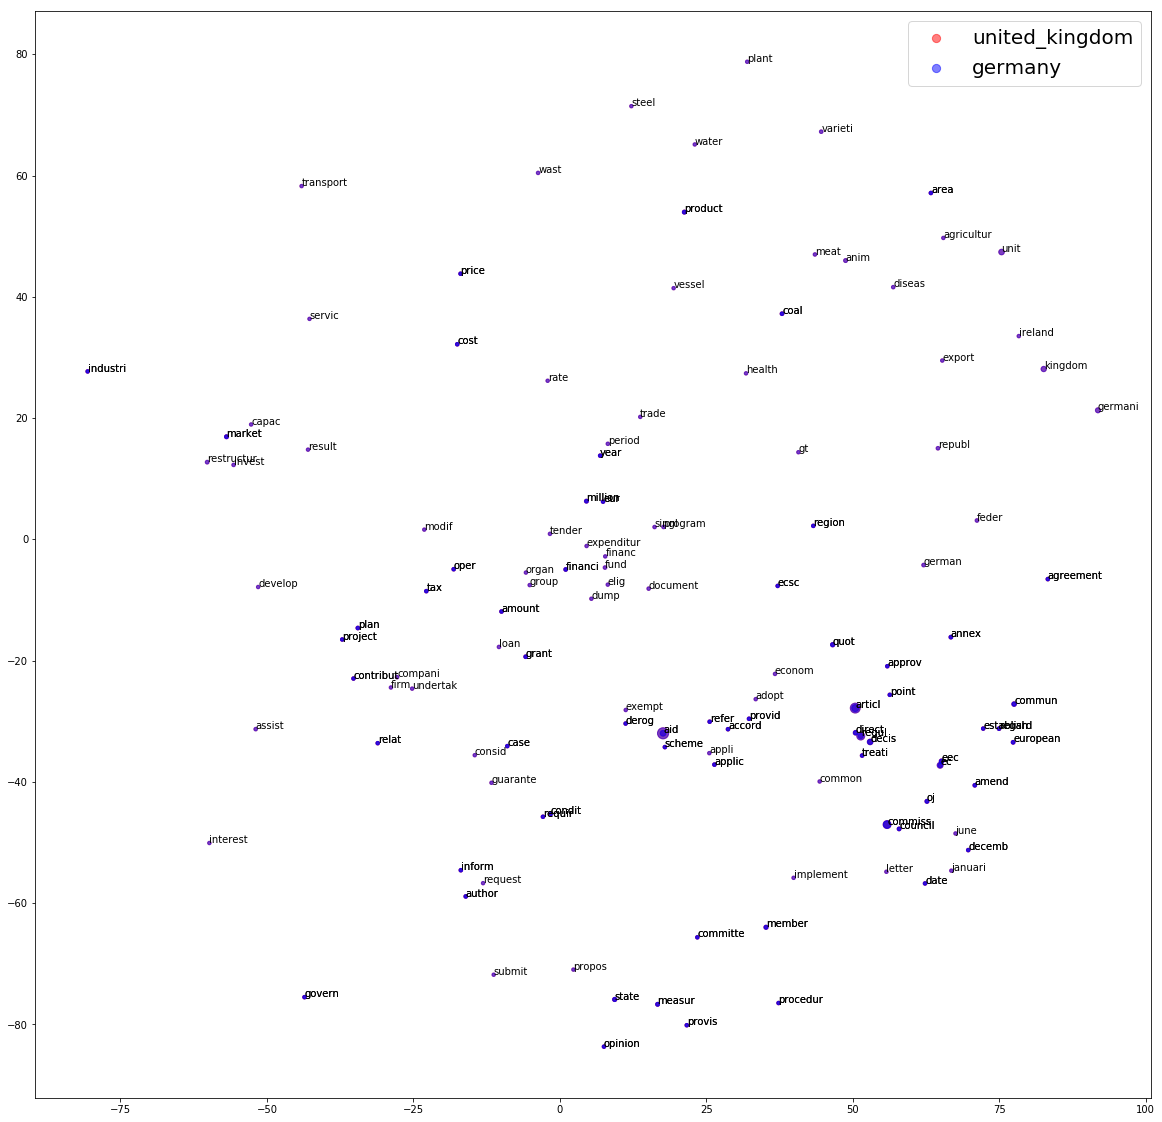

In [133]:
# t['title'].value_counts()
draw_picture_for_two_category('united_kingdom', 'germany')

100%|██████████| 13964/13964 [00:25<00:00, 555.38it/s]


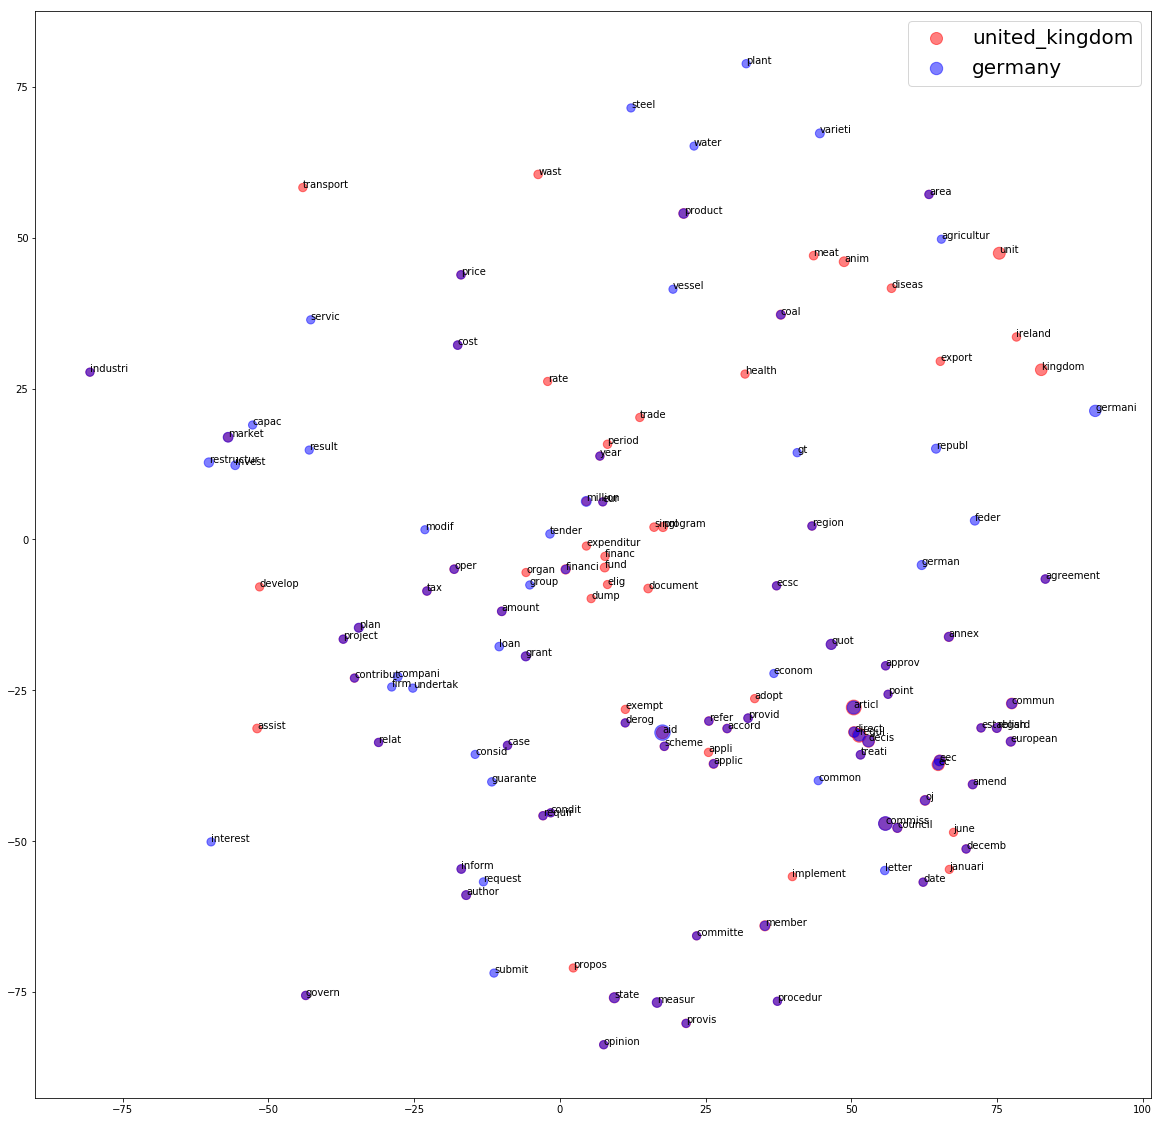

In [105]:
# draw_picture_for_two_category('united_kingdom', 'germany') (старое)

100%|██████████| 15822/15822 [00:20<00:00, 782.90it/s]


200


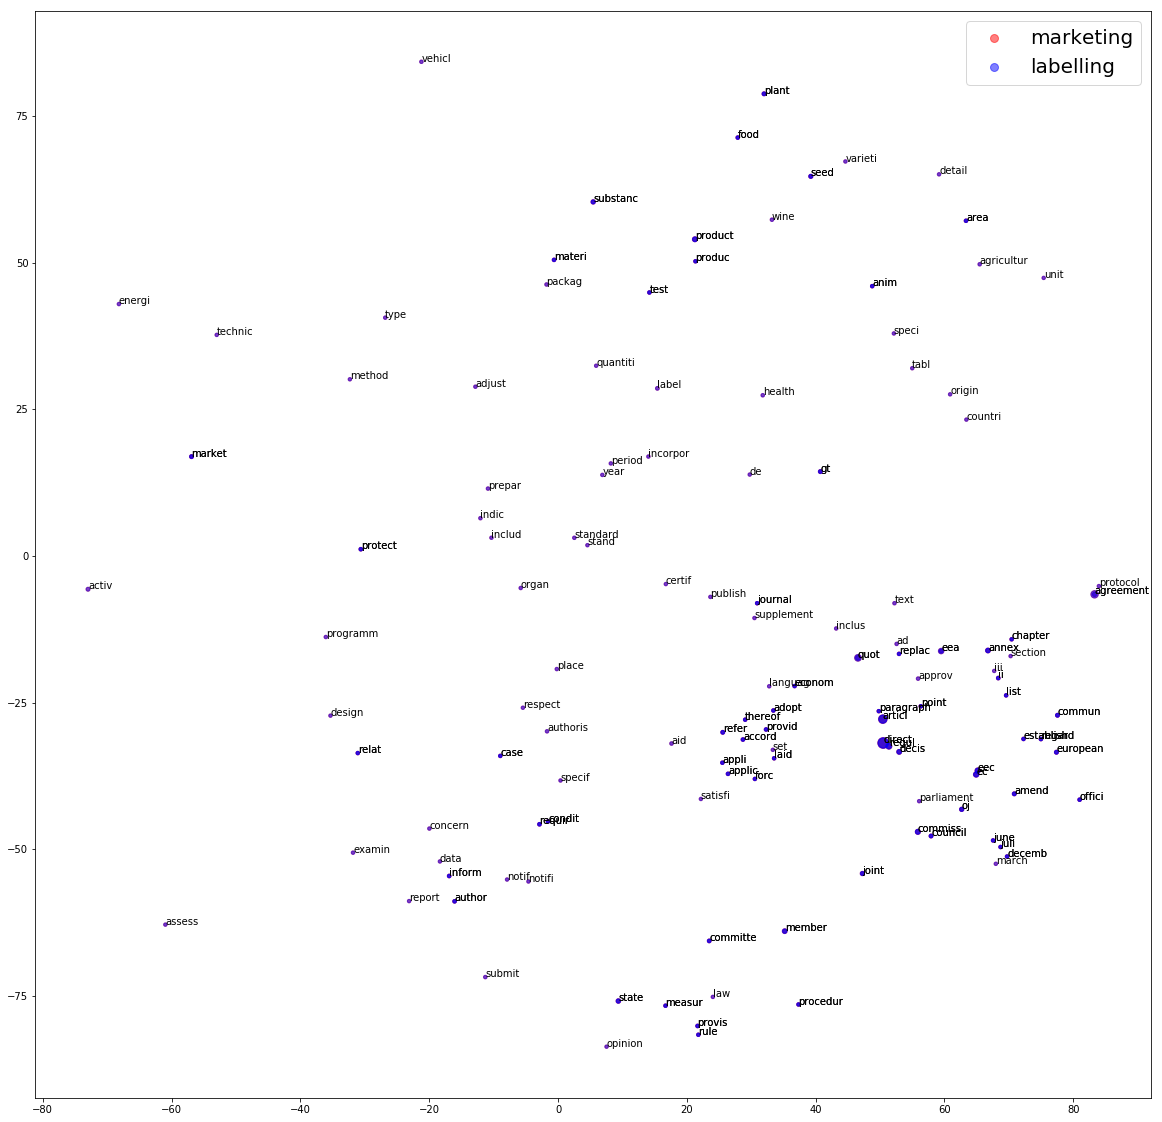

In [134]:
draw_picture_for_two_category('marketing', 'labelling')

100%|██████████| 15822/15822 [00:20<00:00, 768.71it/s]


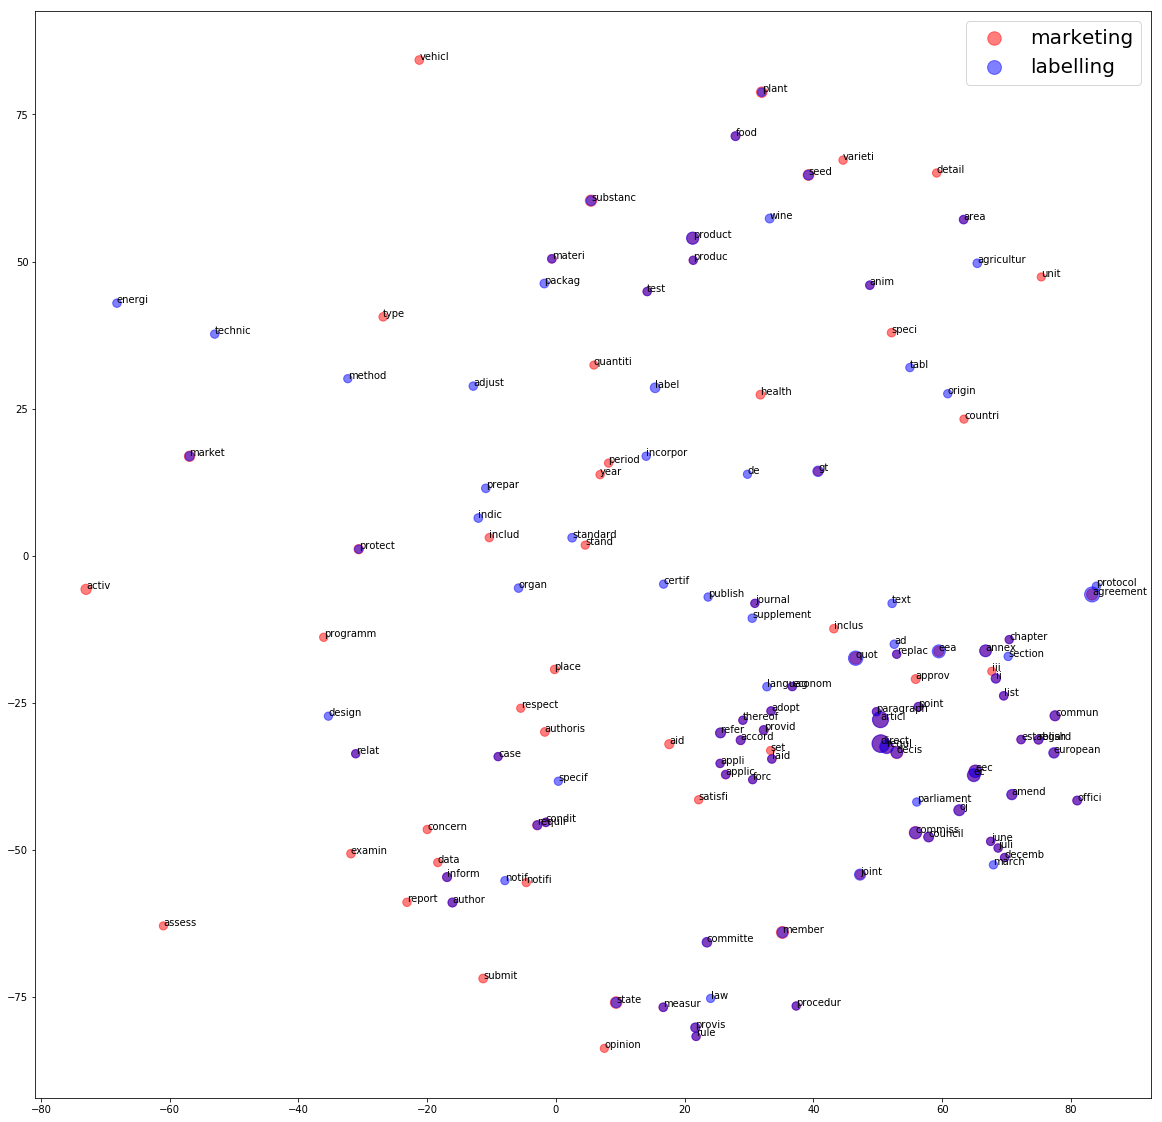

In [106]:
# draw_picture_for_two_category('marketing', 'labelling') (старое)

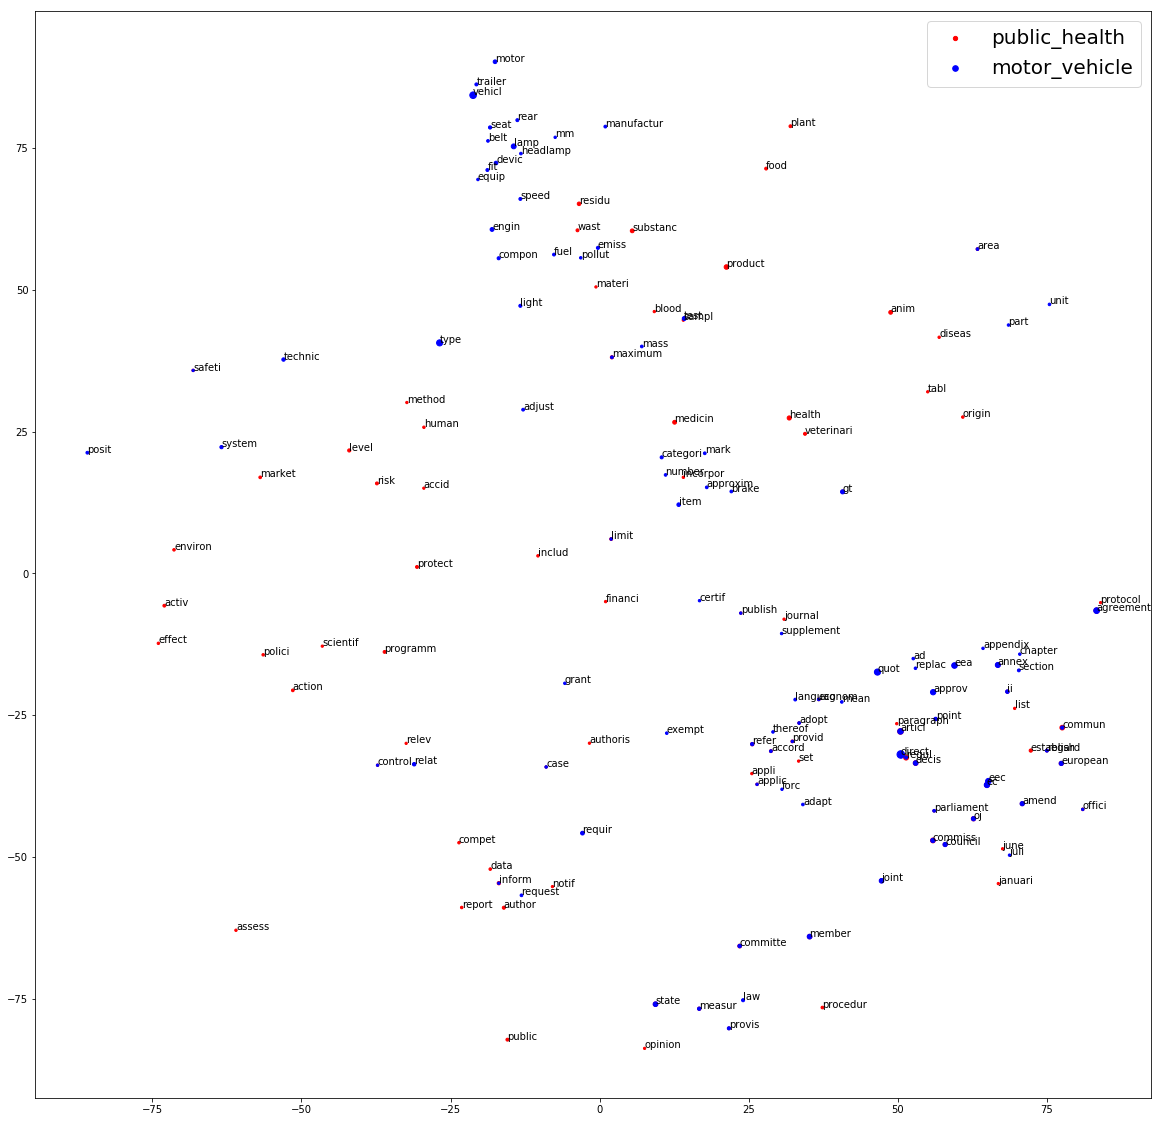

In [73]:
старое (не удаляйте)

(старый отрисовщик)
def draw_picture_for_two_category(category1 = 'public_health', category2 = 'motor_vehicle'):
    max_vocab_size = 10000
    emb_size = 100

    word2vec_our_model = Word2Vec([i.split(' ') for i in df['text']], 
                                  max_vocab_size=max_vocab_size, 
                                  size=emb_size, window=5, min_count=5, workers=8, seed=1)
    
    #Определим топовые слова для каждого класса

    category1_df = t[t['title'] == category1]['text']
    category2_df = t[t['title'] == category2]['text']

    y_ = t['title']
    from sklearn.feature_extraction.text import TfidfVectorizer
    vect1 = TfidfVectorizer()
    x1 = vect1.fit_transform(category1_df)
    w1 = {} # color for class 1
    for word, ind in tqdm(vect1.vocabulary_.items()):
        w1[word] = x1[:, ind].mean()

    vect2 = TfidfVectorizer()
    x2 = vect2.fit_transform(category2_df)
    w2 = {} # color for class 2
    for word, ind in tqdm(vect2.vocabulary_.items()):
        w2[word] = x2[:, ind].mean()

        dct = df2.T
    
    #Возьмем топ отрисуем topN слов

    def size(lst):
        return 5**(2.5+10*np.array(lst))

    topN = 100
    lst_w_all = []
    plt.figure(figsize = (20,20))
    lst_w, lst_x, lst_y, lst_clr = [], [], [], []
    for _w1, clr in list(sorted(w1.items(), key = lambda x:-x[1]))[:topN]:
        if _w1 in dct:
            lst_w_all.append(_w1)
            lst_x.append(dct[_w1]['x'])
            lst_y.append(dct[_w1]['y'])
            lst_clr.append(clr)
    plt.scatter(lst_x, lst_y, s = size(lst_clr), color = 'red', label = category1, alpha = 0.5)

    lst_w, lst_x, lst_y, lst_clr = [], [], [], []
    for _w2, clr in list(sorted(w2.items(), key = lambda x:-x[1]))[:topN]:
        if _w2 in dct:
            lst_w_all.append(_w2)
            lst_x.append(dct[_w2]['x'])
            lst_y.append(dct[_w2]['y'])
            lst_clr.append(clr)

    plt.scatter(lst_x, lst_y, s = size(lst_clr), color = 'blue', label = category2, alpha = 0.5)

    for w in list(set(lst_w_all)):
        if w in dct:
            plt.annotate(w, (dct[w]['x'], dct[w]['y']))
    plt.legend(fontsize = 20)
    plt.show()

In [26]:
vocab = list(word2vec_our_model.wv.vocab)


In [31]:
vect1.vocabulary_

{'patient': 5584,
 'convuls': 1696,
 'instantan': 4016,
 'urbanis': 8204,
 'flazasulfuron': 3056,
 'herbal': 3584,
 'rhea': 6647,
 'mutagenesi': 5055,
 'brown': 971,
 'aquarium': 451,
 'ld': 4378,
 'nato': 5104,
 'come': 1493,
 'commenc': 1497,
 'skydd': 7093,
 'condens': 1585,
 'koc': 4294,
 'disclosur': 2252,
 'miert': 4877,
 'jar': 4193,
 'flower': 3077,
 'geometri': 3323,
 'segment': 6901,
 'methoxycoumarin': 4821,
 'mother': 5009,
 'parallel': 5526,
 'metal': 4804,
 'freight': 3193,
 'parasit': 5534,
 'michael': 4854,
 'hearer': 3551,
 'synergist': 7576,
 'year': 8575,
 'cite': 1374,
 'rectal': 6440,
 'rotterdam': 6722,
 'britain': 948,
 'sesam': 6958,
 'percept': 5649,
 'cent': 1220,
 'suicid': 7471,
 'whoop': 8476,
 'conductor': 1591,
 'unavail': 8057,
 'ic': 3764,
 'unab': 8046,
 'matern': 4705,
 'egg': 2494,
 'univers': 8136,
 'mycotoxin': 5071,
 'dri': 2379,
 'race': 6315,
 'salad': 6756,
 'virtu': 8338,
 'celeriac': 1211,
 'equal': 2693,
 'techniqu': 7655,
 'compliant': 1547

In [33]:
x1.shape

(382, 8644)